In [61]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("iamsouravbanerjee/indian-actor-images-dataset")

# print("Path to dataset files:", path)

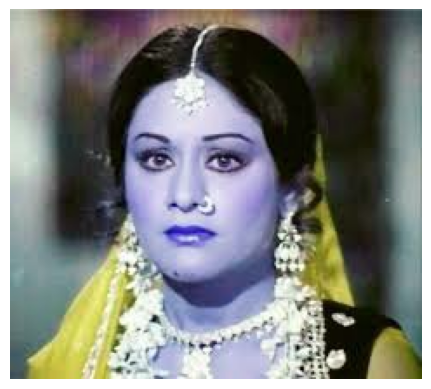

In [62]:
import cv2
import matplotlib.pyplot as plt

img2=r"M:\Deep Learning\CNN\ImageData\Bollywood Actor Images\Bollywood Actor Images\aruna_irani\0bdadc3a12.jpg"
# img = '/root/.cache/kagglehub/datasets/iamsouravbanerjee/indian-actor-images-dataset/versions/5/Bollywood Actor Images/Bollywood Actor Images/amitabh_bachchan/01be2dc1ce.jpg'
# img2  = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/indian-actor-images-dataset/versions/5/Bollywood Actor Images/Bollywood Actor Images/anushka_shetty/74bf4dfc29.jpg"
img= cv2.imread(img2)

# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dropout, Conv2D
from tensorflow.keras.optimizers import Adam

from PIL import Image
import os
import cv2



In [64]:
# # base_dir = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/indian-actor-images-dataset/versions/5/Bollywood Actor Images/Bollywood Actor Images"
base_dir = r"M:\Deep Learning\CNN\ImageData\Bollywood Actor Images\Bollywood Actor Images"

In [65]:
#scale
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)

In [66]:
# using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200,200),
    batch_size=20,
    class_mode='sparse', #None, 'categorical', 'binary', 'sparse', 'input'
    subset='training'
)



# using 20% of data for validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200,200), #resize the images to 150x150
    batch_size=20,
    class_mode='sparse',
    subset='validation',
    shuffle=False # disable shuffling for validate data
)

Found 5480 images belonging to 137 classes.
Found 1370 images belonging to 137 classes.


In [67]:
train_generator.class_indices

{'abhay_deol': 0,
 'adil_hussain': 1,
 'ajay_devgn': 2,
 'akshay_kumar': 3,
 'akshaye_khanna': 4,
 'amitabh_bachchan': 5,
 'amjad_khan': 6,
 'amol_palekar': 7,
 'amole_gupte': 8,
 'amrish_puri': 9,
 'anil_kapoor': 10,
 'annu_kapoor': 11,
 'anupam_kher': 12,
 'anushka_shetty': 13,
 'arshad_warsi': 14,
 'aruna_irani': 15,
 'ashish_vidyarthi': 16,
 'asrani': 17,
 'atul_kulkarni': 18,
 'ayushmann_khurrana': 19,
 'boman_irani': 20,
 'cats': 21,
 'chiranjeevi': 22,
 'chunky_panday': 23,
 'danny_denzongpa': 24,
 'darsheel_safary': 25,
 'deepika_padukone': 26,
 'deepti_naval': 27,
 'dev_anand': 28,
 'dharmendra': 29,
 'dilip_kumar': 30,
 'dimple_kapadia': 31,
 'dogs': 32,
 'farhan_akhtar': 33,
 'farida_jalal': 34,
 'farooq_shaikh': 35,
 'girish_karnad': 36,
 'govinda': 37,
 'gulshan_grover': 38,
 'hrithik_roshan': 39,
 'huma_qureshi': 40,
 'irrfan_khan': 41,
 'jaspal_bhatti': 42,
 'jeetendra': 43,
 'jimmy_sheirgill': 44,
 'johnny_lever': 45,
 'kader_khan': 46,
 'kajol': 47,
 'kalki_koechlin': 

In [68]:
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()

# Layer 1:
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(layers.MaxPooling2D(2, 2))

# Layer 2:
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(layers.MaxPooling2D(2, 2))

# Layer 3:
model.add(layers.Conv2D(128, (5,5), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(layers.MaxPooling2D(2, 2))

# Layer 4:
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Flatten and Fully Connected Layers:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here

model.add(layers.Dense(137, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Adjusted learning rate
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 196, 196, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 196, 196, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 94, 94, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 94, 94, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 43, 43, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 19, 19, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 137)            │        35,209 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,098,313 (11.82 MB)

 Trainable params: 3,097,097 (11.81 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [69]:
modehistory = model.fit(train_generator, epochs=13, validation_data=validation_generator)


Epoch 1/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 175s 625ms/step - accuracy: 0.0181 - loss: 5.2263 - val_accuracy: 0.0270 - val_loss: 5.3839
Epoch 2/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 619ms/step - accuracy: 0.1063 - loss: 4.2270 - val_accuracy: 0.0679 - val_loss: 4.8163
Epoch 3/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 171s 622ms/step - accuracy: 0.2574 - loss: 3.4499 - val_accuracy: 0.0818 - val_loss: 5.1265
Epoch 4/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 620ms/step - accuracy: 0.4935 - loss: 2.4182 - val_accuracy: 0.2277 - val_loss: 4.2930
Epoch 5/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 619ms/step - accuracy: 0.7367 - loss: 1.3766 - val_accuracy: 0.3073 - val_loss: 4.0001
Epoch 6/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 620ms/step - accuracy: 0.9348 - loss: 0.5494 - val_accuracy: 0.3482 - val_loss: 3.8614
Epoch 7/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 188s 687ms/step - accuracy: 0.9914 - loss: 0.1710 - val_accuracy: 0.3547 - val_loss: 3.9005
Epoch 8/13
274/274 ━━━━━━━━━━━━━━━━━━━━ 181s 662ms/step - accuracy: 0.9995 -

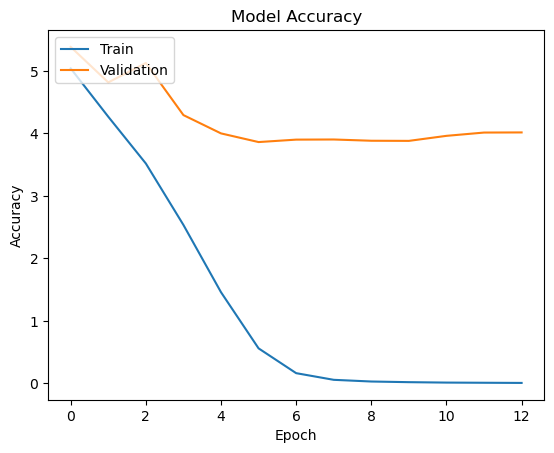

In [70]:
plt.plot(modehistory.history['loss'])
plt.plot(modehistory.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

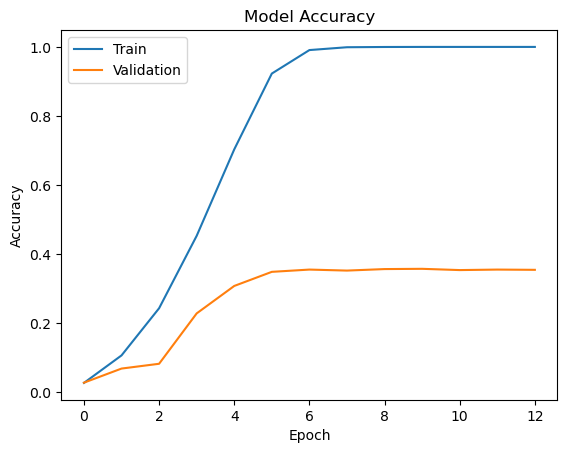

In [75]:
plt.plot(modehistory.history['accuracy'])
plt.plot(modehistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
# model = open(r"M:\Deep Learning\CNN\Projects\You_look_like\you_look_like.h5",'rb')

In [72]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['abhay_deol',
 'adil_hussain',
 'ajay_devgn',
 'akshay_kumar',
 'akshaye_khanna',
 'amitabh_bachchan',
 'amjad_khan',
 'amol_palekar',
 'amole_gupte',
 'amrish_puri',
 'anil_kapoor',
 'annu_kapoor',
 'anupam_kher',
 'anushka_shetty',
 'arshad_warsi',
 'aruna_irani',
 'ashish_vidyarthi',
 'asrani',
 'atul_kulkarni',
 'ayushmann_khurrana',
 'boman_irani',
 'cats',
 'chiranjeevi',
 'chunky_panday',
 'danny_denzongpa',
 'darsheel_safary',
 'deepika_padukone',
 'deepti_naval',
 'dev_anand',
 'dharmendra',
 'dilip_kumar',
 'dimple_kapadia',
 'dogs',
 'farhan_akhtar',
 'farida_jalal',
 'farooq_shaikh',
 'girish_karnad',
 'govinda',
 'gulshan_grover',
 'hrithik_roshan',
 'huma_qureshi',
 'irrfan_khan',
 'jaspal_bhatti',
 'jeetendra',
 'jimmy_sheirgill',
 'johnny_lever',
 'kader_khan',
 'kajol',
 'kalki_koechlin',
 'kamal_haasan',
 'kangana_ranaut',
 'kay_kay_menon',
 'konkona_sen_sharma',
 'kulbhushan_kharbanda',
 'lara_dutta',
 'madhavan',
 'madhuri_dixit',
 'mammootty',
 'manoj_bajpayee',
 

In [73]:
# with open('actor_list.txt','w') as actor:
#     pass

In [79]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image
# "M:\Deep Learning\CNN\ImageData\Bollywood Actor Images\Bollywood Actor Images\tabu\5cb570cd00.jpg"
img2=r"M:\Deep Learning\CNN\ImageData\akshay-kumar.jpg"
# img2 = "/content/ved.jpeg"
# img2 ='/content/akshay-kumar.jpg'
# img2 = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/indian-actor-images-dataset/versions/5/Bollywood Actor Images/Bollywood Actor Images/utpal_dutt/96b5f04e0c.jpg"
# img2 = r"M:\Deep Learning\CNN\ImageData\Bollywood Actor Images\Bollywood Actor Images\dogs\dog.3059.jpg"


# img2="/content/dev.jpg"
# img2='/content/ved.jpeg'
# img2='/content/Trisha.jpeg'
# img2='/content/pathakjii.jpg'

image = load_img(img2, target_size=(200, 200))  # Adjust target_size based on your model's input

# Convert the image to an array
img_array = img_to_array(image)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0  # Adjust if necessary based on your model's training

predictions = model.predict(img_array)

# print("Raw predictions:", predictions[0])



predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_labels[predicted_class_index]

print("Predicted label:", predicted_label)

top_n = 1  # You can change this to display the top N predictions
top_n_indices = np.argsort(predictions[0])[-top_n:]

print(f"Top {top_n} predictions:")
for idx in reversed(top_n_indices):
    print(f"Class: {class_labels[idx]}, Probability: {predictions[0][idx]*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted label: akshay_kumar
Top 1 predictions:
Class: akshay_kumar, Probability: 45.76%


In [ ]:
# model.save('you_look_like.h5')

In [ ]:
# 